In [1]:
import os
os.chdir('/home/roberto/Documents/Titulación/Tesina')
import pandas as pd

In [2]:
from scripts import *

### Países disponibles:

##### -España
##### -Alemania

### Años disponibles:

##### 2008 a 2017

Correr siguiente celda para repetir toda la simulación

In [ ]:
#import multiprocessing
#from joblib import delayed, Parallel

#Parallel(n_jobs=multiprocessing.cpu_count()-3)(delayed(solar_year)(country,year) for country in paises for year in years)

Correr siguiente celda para leer archivos existentes de simulación anterior

In [ ]:
#todo = {}
#for year in years:
#    for country in paises:
#        todo[country+str(year)]=pd.read_csv('../Archivos/Output/'+country+str(year)+'.csv',parse_dates=[0])
#        todo[country+str(year)].set_index('time',inplace=True)
#        todo[country+str(year)]=todo[country+str(year)]/1000            ## Convertir a GW

Correr siguiente celda para integrar todos los datos en un único df

In [ ]:
#df = pd.concat([todo['Spain2008'],todo['Germany2008']],axis=1)

#for year in years[1:]:
#    df_aux = pd.concat([todo['Spain'+str(year)],todo['Germany'+str(year)]],axis=1)
#    df = pd.concat([df,df_aux])
    
#df.to_csv('../Archivos/Output/Combinado.csv')

Lectura del df único

In [8]:
import pandas as pd
import datetime as dt
df = pd.read_csv('../Archivos/Output/Combinado.csv',parse_dates=[0])
df = df[(df['time'] < '2018-01-01')]
df.set_index('time',inplace=True)
df.index.drop_duplicates(keep=False)

DatetimeIndex(['2008-01-01 00:00:00', '2008-01-01 01:00:00',
               '2008-01-01 02:00:00', '2008-01-01 03:00:00',
               '2008-01-01 04:00:00', '2008-01-01 05:00:00',
               '2008-01-01 06:00:00', '2008-01-01 07:00:00',
               '2008-01-01 08:00:00', '2008-01-01 09:00:00',
               ...
               '2017-12-31 14:00:00', '2017-12-31 15:00:00',
               '2017-12-31 16:00:00', '2017-12-31 17:00:00',
               '2017-12-31 18:00:00', '2017-12-31 19:00:00',
               '2017-12-31 20:00:00', '2017-12-31 21:00:00',
               '2017-12-31 22:00:00', '2017-12-31 23:00:00'],
              dtype='datetime64[ns]', name='time', length=87456, freq=None)

Modificación para graficar

In [13]:
df['doy'] = df.index.dayofyear
df['tiempo']=df.index.time
df['Year'] = df.index.year
df['ind']= df['doy'].astype(str)+"-"+ df['tiempo'].astype(str)
df['ind']=pd.to_datetime(df['ind'],format='%j-%H:%M:%S')

España

In [14]:
piv = pd.pivot_table(df, index=['ind'],columns=['Year'], values=['Spain'])
piv = piv[(piv.index <'1901-01-01')]

Gráfica cinco días de producción

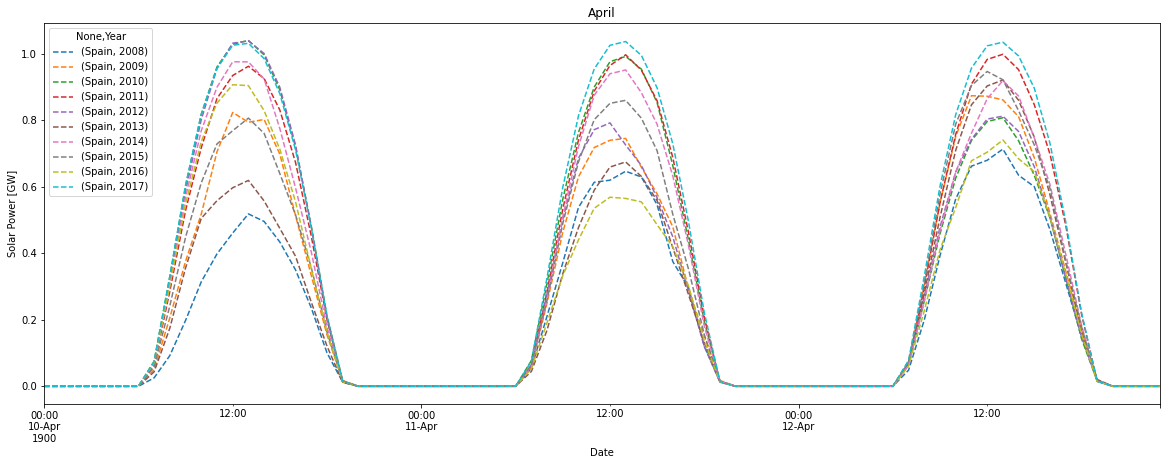

In [23]:
import numpy as np

mes = np.random.choice(list(piv.index.month.unique()))

import calendar

aux = piv[piv.index.month==mes]
split = np.array_split(aux,10)

x = np.random.choice(range(10))

titulo = str(calendar.month_name[mes])

split[x].plot(title = titulo,figsize=(20,7),xlabel = 'Date',ylabel='Solar Power [GW]', ls='--')

plt.show()
plt.close()

Obtención de mejor, peor, media y mediana en producción de los diez años

In [24]:
df = pd.read_csv('../Archivos/Output/Combinado.csv',parse_dates=[0])
df = df[(df['time'] < '2018-01-01')]
df.set_index('time',inplace=True)
df.index.drop_duplicates(keep=False)

Spain = df['Spain']

In [25]:
total = {}
for year in years:
    total[str(year)] = Spain.loc[str(year)].sum()
sumas = pd.DataFrame.from_dict(total,orient='index')
sumas.rename(columns={0:'GW totales'},inplace=True)
sumas

,GW totales
2008,2129.313378
2009,2178.403225
2010,2067.232506
2011,2177.438478
2012,2224.631680
2013,2132.083139
2014,2110.270166
2015,2197.684000
2016,2119.607672
2017,2252.499903


In [26]:
sumas.describe()

,GW totales
count,10.000000
mean,2158.916415
std,56.975659
min,2067.232506
25%,2122.034099
50%,2154.760809
75%,2192.863806
max,2252.499903


Área elegible:
Llamar la función eligible_area con argumento 'Spain' o 'Germany' y segundo argumento él uso de suelo a contemplar en el mapa

Uso de suelo disponible:
water
(34,35,39,40)